# Problem Set #6
- MACS 30150, Dr. Evans 
- Name: Kento Yoshizawa (CNET: kyoshizawa) 
- Date: February 19, 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import statsmodels.api as sm

## Question 1.
### (a)

In [2]:
df = pd.read_csv('data/Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


Although `horsepower` should be integer (or numerical variables), the data frame recognizes them as objects (strings). Thus, `horsepower` might contain some strings. 

In [4]:
df[df['horsepower'].str.contains(r'\D')]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


Just in case, check if `name` contains inappropriate symbols but they seem OK.

In [5]:
df[df['name'].str.contains(r'\W \S')]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
288,18.2,8,318.0,135,3830,15.2,79,1,dodge st. regis
292,18.5,8,360.0,150,3940,13.0,79,1,chrysler lebaron town @ country (sw)


In [6]:
df_auto = pd.read_csv('data/Auto.csv', na_values = '?')
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


### (b)

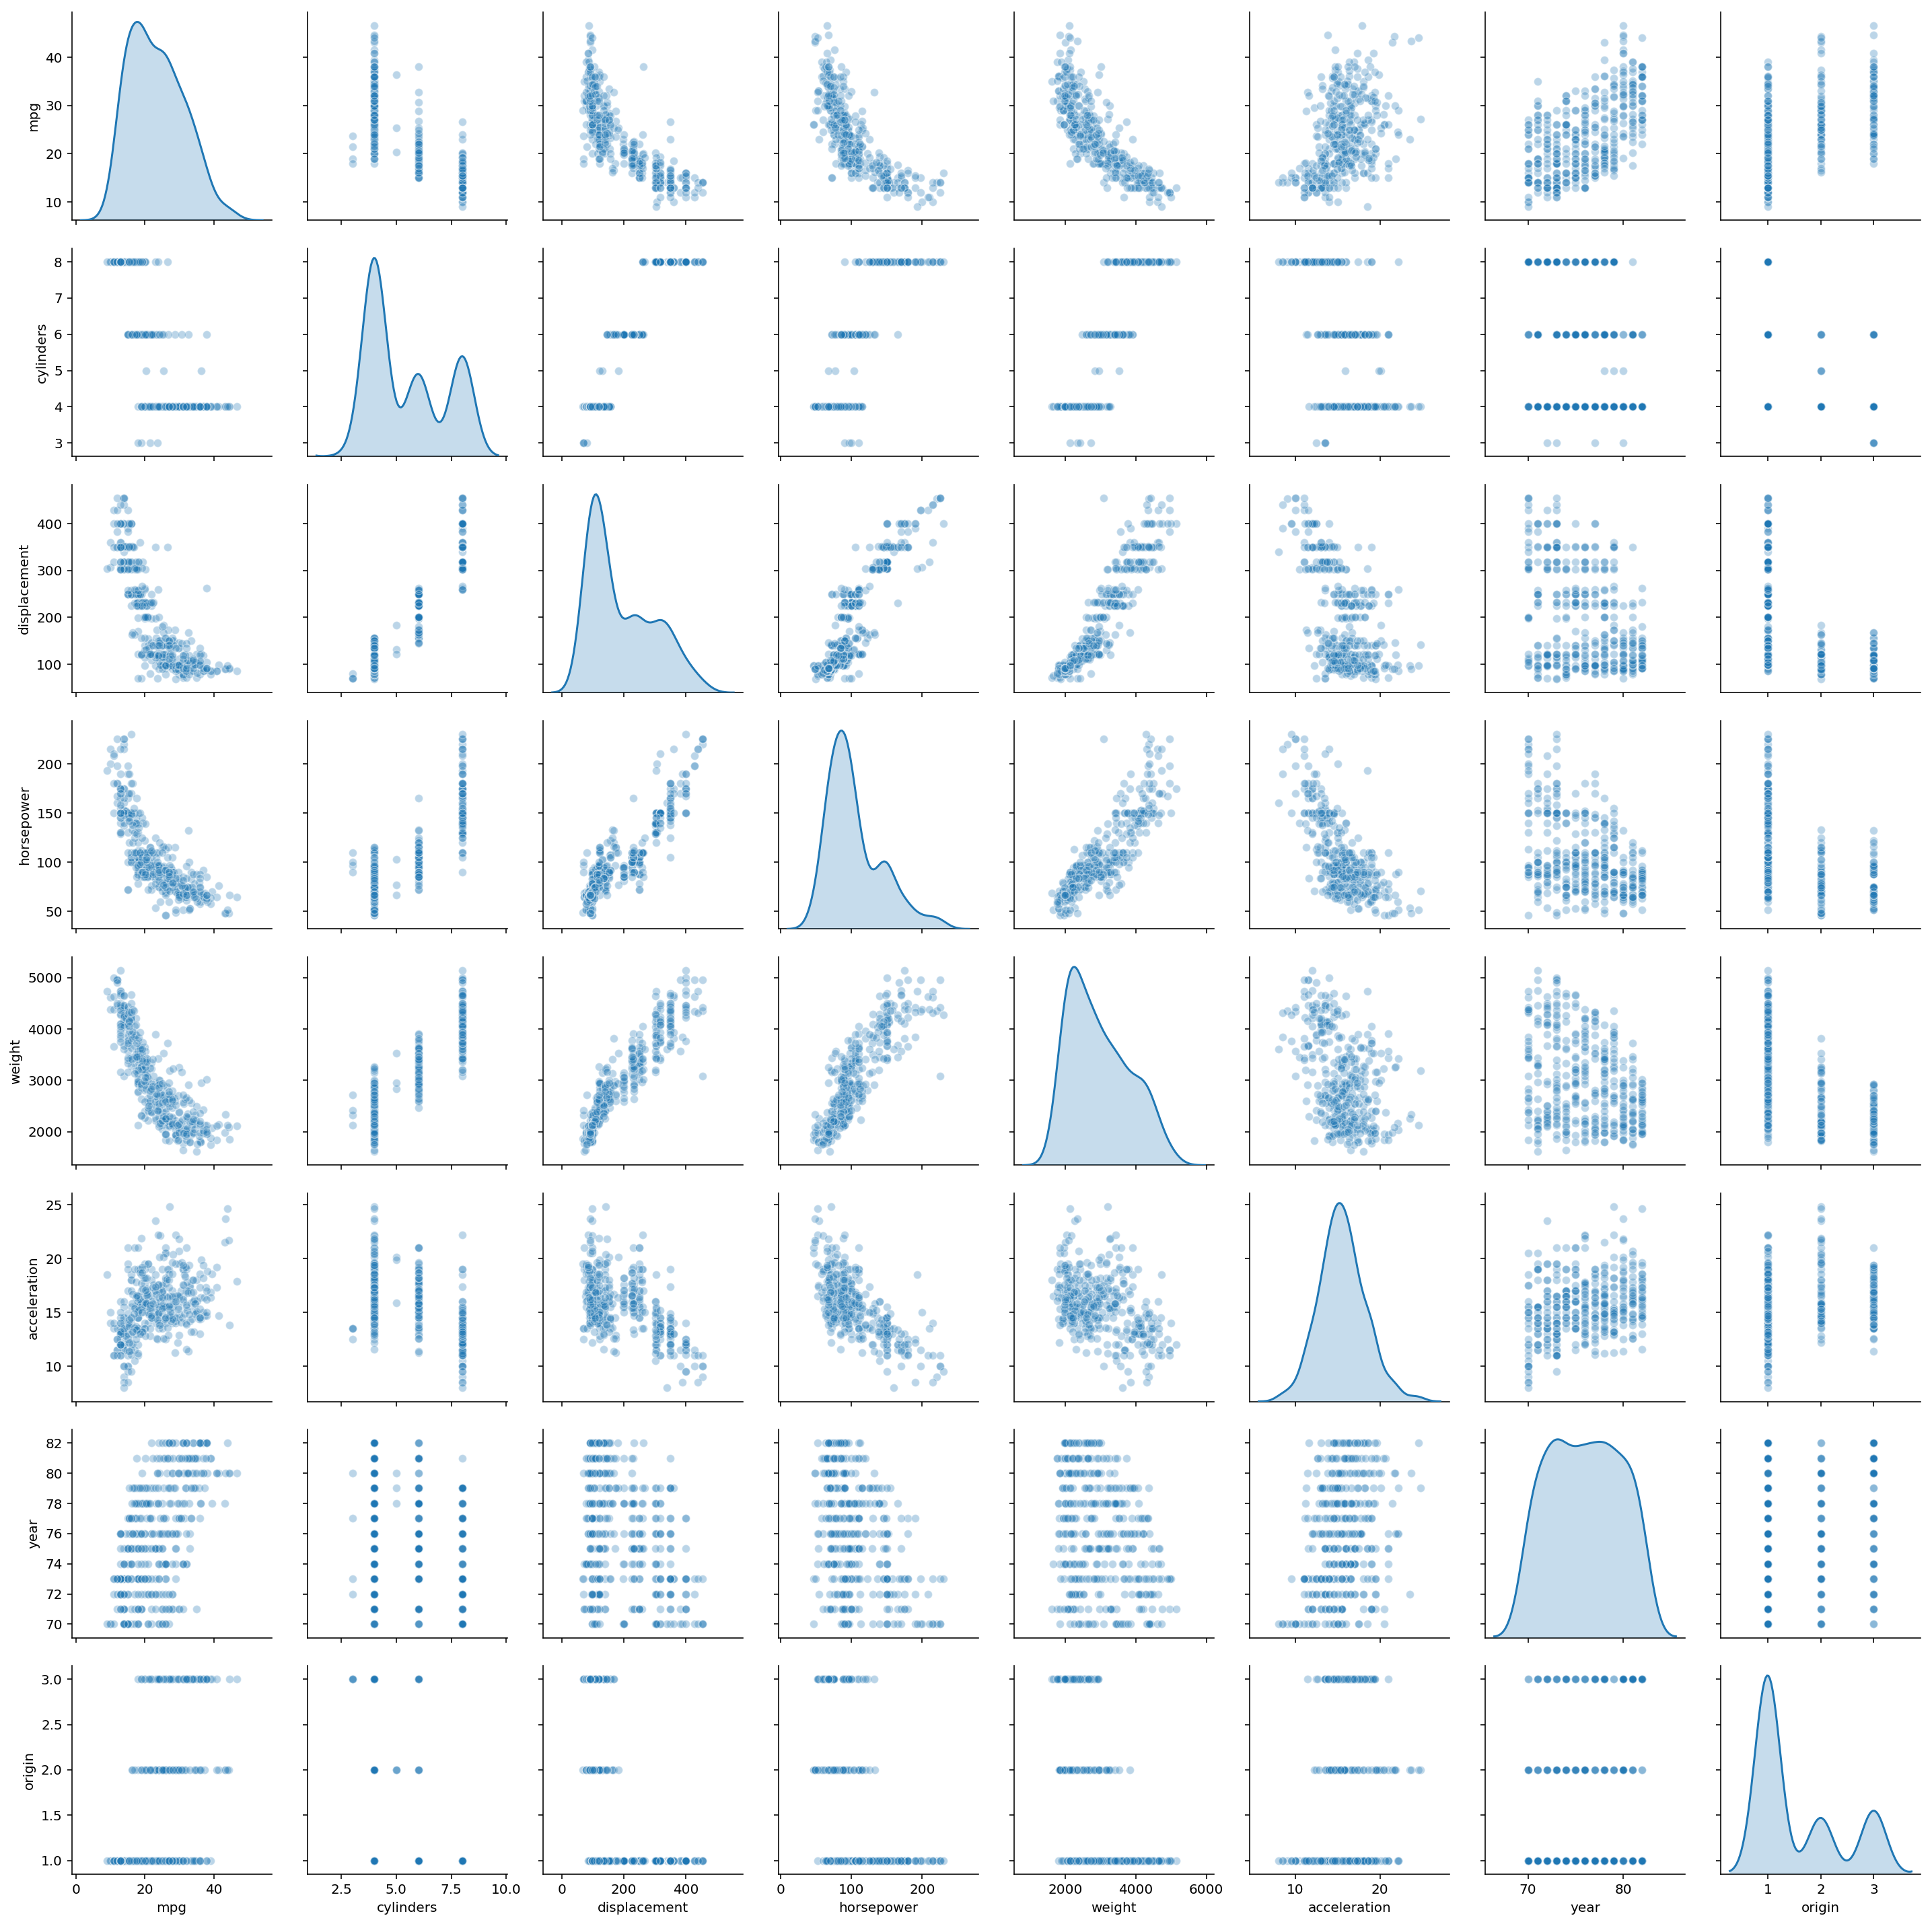

In [8]:
sns.pairplot(df_auto, dropna = True, diag_kind = 'kde',plot_kws={'alpha': 0.3});

### (c)

In [7]:
df_auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


### (d)

In [8]:
df_auto['const'] = 1

In [9]:
y = df_auto['mpg']
X = df_auto.drop(['mpg','name'], axis = 1)
reg1 = sm.OLS(endog = y, exog = X, missing = 'drop')
result1 = reg1.fit()

In [10]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          2.04e-139
Time:                        00:34:16   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.4934      0.323     -1.526   

#### (i)

In [11]:
print('Statistically significant at the 1% level:\n coefficients of',\
      result1.pvalues[result1.pvalues < 0.01].index.tolist())

Statistically significant at the 1% level:
 coefficients of ['displacement', 'weight', 'year', 'origin', 'const']


#### (ii)

In [12]:
print('Not statistically significant at the 10% level:\n coefficients of',\
      result1.pvalues[result1.pvalues > 0.1].index.tolist())

Not statistically significant at the 10% level:
 coefficients of ['cylinders', 'horsepower', 'acceleration']


#### (iii)

In [13]:
print('Ceteris paribus, one model year newer car is associated with {0:.4f} mpg increase'\
      .format(result1.params.year))

Ceteris paribus, one model year newer car is associated with 0.7508 mpg increase


### (e)

`displacement`,`horsepower`, and `weight` seem to have a nonlinear relationship with `mpg`

#### (i)

In [14]:
df_auto2 = df_auto.assign(displacement2 = lambda df: df.displacement ** 2) \
                  .assign(horsepower2   = lambda df: df.horsepower ** 2) \
                  .assign(weight2       = lambda df: df.weight ** 2) \
                  .assign(acceleration2 = lambda df: df.acceleration ** 2)

In [15]:
X2 = df_auto2.drop(['mpg','name'], axis = 1)
reg2 = sm.OLS(endog = y, exog = X2, missing = 'drop')
result2 = reg2.fit()

In [16]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          1.75e-160
Time:                        00:34:19   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
cylinders         0.2519      0.326      0.773

#### (ii)

In [17]:
print("Adjusted R-squared from part (d): {0:.4f}\n\
Adjusted R-squared from part (e): {1:.4f}" \
      .format(result1.rsquared_adj, result2.rsquared_adj))

Adjusted R-squared from part (d): 0.8182
Adjusted R-squared from part (e): 0.8657


Thus, adjusted R-squared from part (d) is better than that from part (d)

#### (iii)
Both `displacement` and its squared term are not statistically significant at the 10% level though `displacement` from part (d) is significant at the 1% level. 

#### (iv)

`cylinders` is not statistically significant at the 10% level.

### (f)

In [18]:
## Use all variables
cy, disp, horse, wt, acc, year, ori, const = 6, 200, 100, 3100, 15.1, 99, 1, 1
pred_exog = [cy, disp, horse, wt, acc, year, ori, const, disp**2, horse**2, wt**2, acc**2]

print("The predicted miles per gallon of a car with given condition: {0:.3f} mpg".format(*result2.predict(exog=pred_exog)))

The predicted miles per gallon of a car with given condition: 38.732 mpg


In [19]:
## restrict significant variables (that is, excluding cylinders, displacement and its squared term)
print('Not statistically significant at the 10% level:\n coefficients of',\
      result2.pvalues[result2.pvalues > 0.1].index.tolist())

cy, disp, horse, wt, acc, year, ori,const,  =  0, 0, 100, 3100, 15.1, 99, 1, 1
pred_exog = [cy, disp, horse, wt, acc, year, ori, const, disp**2, horse**2, wt**2, acc**2]

print("\nThe predicted miles per gallon of a car with given condition: {0:.3f} mpg".format(*result2.predict(exog=pred_exog)))

Not statistically significant at the 10% level:
 coefficients of ['cylinders', 'displacement', 'displacement2']

The predicted miles per gallon of a car with given condition: 39.704 mpg


## Question 2.

In [25]:
X_train = np.array([[0,  3,  0],
                    [2,  0,  0],
                    [0,  1,  3],
                    [0,  1,  2],
                    [-1, 0,  1],
                    [1,  1,  1]])
X_test = np.array([0, 0, 0])
label = {0: 'Red', 1: 'Green'}
y = np.array([0, 0, 0, 1, 1, 0])

### (a)

In [3]:
l2_norm = np.linalg.norm(X_train, axis = 1)
print('The Euclidean distance between each observation and the test point:')
for i, l in enumerate(l2_norm):
    print(' Obs.{}: {}'.format(i+1, l))

The Euclidean distance between each observation and the test point:
 Obs.1: 3.0
 Obs.2: 2.0
 Obs.3: 3.1622776601683795
 Obs.4: 2.23606797749979
 Obs.5: 1.4142135623730951
 Obs.6: 1.7320508075688772


### (b)

In [40]:
def KNN(X_train, X_test, y, K = 1):
    l2_norm = np.array([np.linalg.norm(X - X_test) for X in X_train])
    if K == 1:
        return y[np.argmin(l2_norm)]
    else:
        n_idx = np.argsort(l2_norm)[:K]
        count = np.bincount(y[n_idx])
        mode = np.argmax(count)
        return mode

In [7]:
print('KNN prediction with K = 1 is', label[KNN(X_train, X_test, y, K = 1)])

KNN prediction with K = 1 is Green


This is because the nearest observation from test point is `#5` whose label is **Green**.

### (c)

In [28]:
print('KNN prediction with K = 3 is', label[KNN(X_train, X_test, y, K = 3)])

[2 1]
KNN prediction with K = 3 is Red


The three nearest observations from test point are `#5`, `#6` and `#2` whose labels are green, red and red respectively. Since the majority is **Red**, the prediction is that.

### (d)
If the decision boundary is highly nonlinear, the best value for K would be small because there is high variance.

### (e)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
y = np.array(['Red', 'Red', 'Red', 'Green', 'Green', 'Red'])
knn.fit(X_train, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [21]:
X_test2 = np.array([1, 1, 1])
print('KNN prediction with K = 2 is',  knn.predict([X_test2]))

KNN prediction with K = 2 is ['Green']


In [27]:
knn.predict_proba([X_test2])

array([[0.5, 0.5]])

In the case of ties, `KNeighborsClassifier` seems to return a label which appears first in the set of neighbors.

## Question 3.

In [28]:
df_auto2 = df_auto.assign(mpg_high = df_auto.mpg.apply(lambda x: 1 if x > np.median(df_auto.mpg) else 0))\
                  .dropna()

### (a)

In [29]:
y_binary = df_auto2['mpg_high']
X = df_auto2.drop(['mpg','name','mpg_high'], axis = 1)

lr1 = sm.Logit(endog = y_binary, exog = X)
result_lr1 = lr1.fit()

Optimization terminated successfully.
         Current function value: 0.189320
         Iterations 9


In [30]:
print(result_lr1.summary())

                           Logit Regression Results                           
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:                  0.7265
Time:                        00:34:25   Log-Likelihood:                -74.213
converged:                       True   LL-Null:                       -271.30
                                        LLR p-value:                 4.235e-81
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.0633      0.437     -0.145      0.885      -0.919       0.792
displacement    -0.0002      0.013     -0.017      0.987      -0.026       0.025
horsepower      -0.0399      0.025     -1.61

In [31]:
print('Statistically significant at the 5% level:\n coefficients of',\
      result_lr1.pvalues[result_lr1.pvalues < 0.05].index.tolist())

Statistically significant at the 5% level:
 coefficients of ['weight', 'year', 'const']


### (b)

In [32]:
from sklearn.model_selection import train_test_split
X = df_auto2.drop(['mpg','name','mpg_high','const'], axis = 1)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y_binary, test_size = 0.5, random_state = 10)

### (c)

In [33]:
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression(random_state = 10,solver = 'liblinear')
lr2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
for v, cf in zip(X_train.columns, lr2.coef_.flatten()):
    print('{0}:\n   {1:.5f}'.format(v,cf))
print('Intercept:\n   {0:.5f}'.format(*lr2.intercept_))

cylinders:
   -0.37505
displacement:
   0.00576
horsepower:
   -0.04851
weight:
   -0.00501
acceleration:
   -0.24087
year:
   0.30656
origin:
   -0.00383
Intercept:
   -0.05207


### (d)

In [35]:
pred = lr2.predict(X_test)

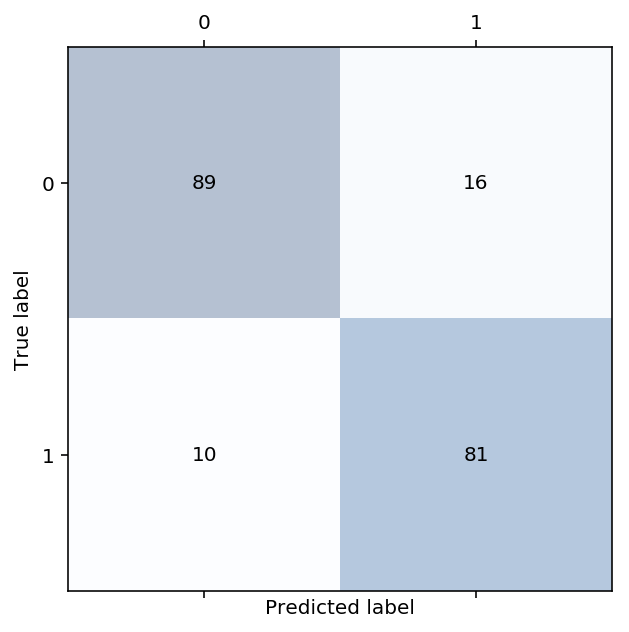

In [36]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true = y_test, y_pred = pred)

fig, ax = plt.subplots(figsize = (5, 5))

ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i,
               s = confmat[i,j],
               va = 'center', ha = 'center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, labels = np.unique(pred)))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       105
           1       0.84      0.89      0.86        91

    accuracy                           0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



The model predicts both labels well.